# Aula 5

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap

In [108]:
dados = pd.read_csv("C:/Users/pedro/Documents/Bootcamp_alura/Modulo_1/dados/A083728189_28_143_208_atendimento.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",", engine="python")

In [109]:
pd.options.display.float_format = "{:.2f}".format
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [110]:
col_preenchidas = dados.mean().index
col_preenchidas = col_preenchidas.insert(0, 'Unidade da Federação')
filtrados = dados[col_preenchidas]
filtrados.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [111]:
filtrados.set_index('Unidade da Federação', inplace=True)

In [112]:
filtrados.drop('Total', axis=1, inplace=True)
filtrados

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2735248.12,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7871556.55,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,35894441.09,33991348.70,32711259.43,31985709.32,34430463.50,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,18772428.20,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53


In [113]:
col_regiao=[]
regioes=['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

for row in filtrados.iterrows():
    
    estado=row[0]
    num_reg = int(estado.split(' ')[0])
    new_estado = estado.split(' ', maxsplit =1)[1]
    filtrados = filtrados.rename(index={estado:new_estado})
    
    if num_reg < 20:
        col_regiao.append(regioes[0])
    elif num_reg < 30:
        col_regiao.append(regioes[1])
    elif num_reg < 40:
        col_regiao.append(regioes[2])
    elif num_reg < 50:
        col_regiao.append(regioes[3])
    else:
        col_regiao.append(regioes[4])

In [114]:
filtrados['regiao']=col_regiao
filtrados.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,Norte
Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,Norte
Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,Norte
Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,Norte
Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,Norte


In [115]:
filtrados['Total'] = filtrados.sum(axis=1)
filtrados.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,regiao,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,Norte,996410650.35
Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,Norte,450047246.65
Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,Norte,1917245104.64
Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,Norte,328876551.40
Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,Norte,4705290466.69


In [116]:
ordenado = filtrados.sort_values('Total', ascending=False).drop('Total', axis=1)

In [117]:
ordenado = ordenado.iloc[:,6:]
ordenado.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,...,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71,Sudeste
Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,...,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00,Sudeste
Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,...,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07,Sul
Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,...,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80,Sul
Rio de Janeiro,44128159.73,42900847.02,45306499.53,43951349.46,44111107.27,44359056.71,42500830.29,43066461.47,44553314.55,41351511.51,...,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48,Sudeste


In [118]:
@ticker.FuncFormatter
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

## Desafio 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html

In [119]:
mes_mais_recente = ordenado.columns[-2]
mes_mais_recente

'2021/Mar'

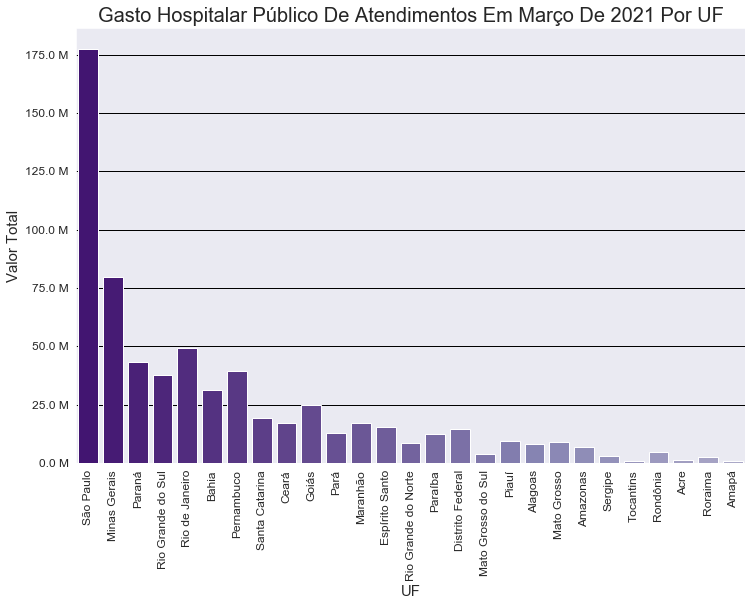

In [120]:
#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Criando uma palheta de cores
sns.set_palette(list(reversed(sns.color_palette('Purples', 50))))

#Criando o gráfico 
sns.barplot(ordenado.index, ordenado[mes_mais_recente])

#Plotando as legendas e mudando o tamanho das fontes
ax.yaxis.set_major_formatter(million_formatter)
plt.title('Gasto Hospitalar Público De Atendimentos Em Março De 2021 Por UF', fontsize=20)
plt.xlabel('UF', fontsize=15)
plt.ylabel('Valor Total', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.grid(b=True, axis='y', color='black', linestyle='-', linewidth=1) # Função do matplotlib.pyplot responsável pelo grid

#Mostrando o gráfico
plt.show()

## Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

In [121]:
gastos_funcao_rj = pd.DataFrame(index = {'Unidade da Federação':ordenado.index})

for i, col in ordenado.iloc[:,:-1].items():
    info = pd.DataFrame(col/col['Rio de Janeiro'])
    gastos_funcao_rj = pd.concat([gastos_funcao_rj, info], axis=1)

In [122]:
gastos_funcao_rj.dropna(inplace=True)
gastos_funcao_rj['Media_Gastos_Funcao_Rj'] = gastos_funcao_rj.mean(axis=1)

In [123]:
gastos_funcao_rj

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Media_Gastos_Funcao_Rj
São Paulo,3.92,3.98,3.76,3.92,3.98,4.05,4.24,4.18,4.31,4.62,...,3.77,3.90,4.14,4.07,3.92,3.61,3.72,4.41,3.61,4.04
Minas Gerais,1.59,1.84,1.74,1.80,1.80,1.85,1.89,1.91,1.99,2.04,...,1.85,2.03,2.22,2.17,2.04,1.84,1.78,1.97,1.62,2.01
Paraná,1.11,1.30,1.24,1.26,1.27,1.35,1.33,1.35,1.38,1.44,...,1.29,1.39,1.49,1.58,1.61,1.35,1.23,1.37,0.88,1.44
Rio Grande do Sul,1.04,1.23,1.15,1.18,1.22,1.27,1.32,1.34,1.34,1.39,...,1.13,1.24,1.34,1.41,1.41,1.29,1.17,1.39,0.77,1.27
Rio de Janeiro,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Bahia,0.76,0.96,0.95,0.96,0.90,1.30,1.02,1.00,0.97,0.99,...,0.95,0.96,0.95,1.03,0.99,0.92,0.81,0.91,0.64,0.97
Pernambuco,0.59,0.72,0.68,0.71,0.66,0.70,0.75,0.71,0.70,0.75,...,0.77,0.85,0.90,0.90,0.87,0.86,0.88,1.02,0.80,0.84
Santa Catarina,0.55,0.64,0.61,0.65,0.66,0.68,0.68,0.71,0.70,0.73,...,0.83,0.84,0.83,0.88,0.96,0.80,0.66,0.78,0.39,0.77
Ceará,0.63,0.70,0.69,0.71,0.67,0.68,0.69,0.71,0.71,0.74,...,0.61,0.61,0.66,0.68,0.65,0.56,0.50,0.50,0.35,0.65
Goiás,0.41,0.49,0.46,0.44,0.46,0.45,0.50,0.50,0.46,0.48,...,0.48,0.53,0.59,0.56,0.48,0.42,0.41,0.53,0.51,0.49


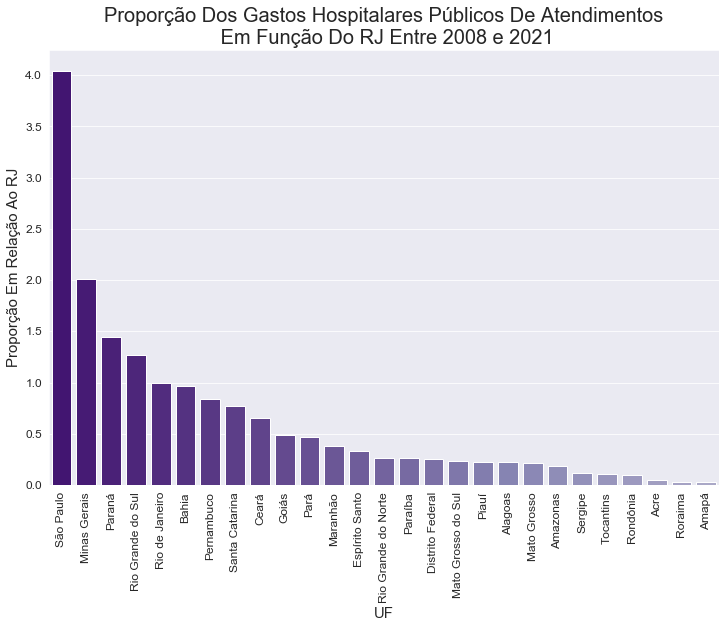

In [124]:
#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando uma palheta de cores
sns.set_palette(list(reversed(sns.color_palette('Purples', 50))))

#Criando o gráfico 
sns.barplot(gastos_funcao_rj.index, gastos_funcao_rj['Media_Gastos_Funcao_Rj'])

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Proporção Dos Gastos Hospitalares Públicos De Atendimentos\n Em Função Do RJ Entre 2008 e 2021', fontsize=20)
plt.xlabel('UF', fontsize=15)
plt.ylabel('Proporção Em Relação Ao RJ', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)

#Mostrando o gráfico
plt.show()

# Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

Lendo os dados de população por UF e por ano

In [125]:
dados_pop = pd.read_excel('C:/Users/pedro/Documents/Bootcamp_alura/Modulo_1/dados/serie_2001_2020_TCU.xls', skiprows=4, skipfooter=10)

In [126]:
dados_pop.head()

,Unidades da Federação,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,Brasil,172385826.00,174632960.00,176871437.00,181581024.00,184184264.00,186770562.00,183989711.00,189612814.00,191480630.00,...,192379287.00,193946886.00,201032714.00,202768562.00,204450649.00,206081432.00,207660929.00,208494900.00,210147125.00,211755692.00
2,Região Norte,13245084.00,13504599.00,13784881.00,14373260.00,14698878.00,15022060.00,14623317.00,15142684.00,15359608.00,...,16095187.00,16318163.00,16983484.00,17231027.00,17472636.00,17707783.00,17936201.00,18182253.00,18430980.00,18672591.00
3,Rondônia,1407886.00,1431777.00,1455907.00,1562085.00,1534594.00,1562417.00,1453756.00,1493566.00,1503928.00,...,1576455.00,1590011.00,1728214.00,1748531.00,1768204.00,1787279.00,1805788.00,1757589.00,1777225.00,1796460.00
4,Acre,574355.00,586942.00,600595.00,630328.00,669736.00,686652.00,655385.00,680073.00,691132.00,...,746386.00,758786.00,776463.00,790101.00,803513.00,816687.00,829619.00,869265.00,881935.00,894470.00


Filtrando por Rio de Janeiro e São Paulo

In [127]:
dados_pop_rj_sp = dados_pop.loc[(dados_pop['Unidades da Federação'] == 'Rio de Janeiro') | (dados_pop['Unidades da Federação'] == 'São Paulo')]
dados_pop_rj_sp

,Unidades da Federação,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
23,Rio de Janeiro,14558545.00,14724475.00,14879118.00,15203750.00,15383407.00,15561720.00,15420450.00,15872362.00,16010429.00,...,16112678.00,16231365.00,16369179.00,16461173.00,16550024.00,16635996.00,16718956.00,17159960.00,17264943.00,17366189.00
24,São Paulo,37630106.00,38177742.00,38709320.00,39825226.00,40442795.00,41055734.00,39827690.00,41011635.00,41384039.00,...,41587182.00,41901219.00,43663669.00,44035304.00,44396484.00,44749699.00,45094866.00,45538936.00,45919049.00,46289333.00


In [128]:
prop_rj_sp = ordenado.loc[['Rio de Janeiro','São Paulo']]
prop_rj_sp.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Rio de Janeiro,44128159.73,42900847.02,45306499.53,43951349.46,44111107.27,44359056.71,42500830.29,43066461.47,44553314.55,41351511.51,...,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48,Sudeste
São Paulo,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,...,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71,Sudeste


Filtrar de 2008 ate 2020

In [129]:
dados_pop_rj_sp = dados_pop_rj_sp.drop(columns= dados_pop_rj_sp.columns[1:8])
dados_pop_rj_sp

,Unidades da Federação,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
23,Rio de Janeiro,15872362.00,16010429.00,15993583.00,16112678.00,16231365.00,16369179.00,16461173.00,16550024.00,16635996.00,16718956.00,17159960.00,17264943.00,17366189.00
24,São Paulo,41011635.00,41384039.00,41252160.00,41587182.00,41901219.00,43663669.00,44035304.00,44396484.00,44749699.00,45094866.00,45538936.00,45919049.00,46289333.00


In [130]:
prop_rj_sp.drop(columns=['2021/Jan', '2021/Fev', '2021/Mar', 'regiao'], inplace=True)
prop_rj_sp

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Rio de Janeiro,44128159.73,42900847.02,45306499.53,43951349.46,44111107.27,44359056.71,42500830.29,43066461.47,44553314.55,41351511.51,...,74595986.00,69437941.81,89725279.21,88135690.57,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87
São Paulo,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,...,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95


In [131]:
lista_anos = []

for col in prop_rj_sp.columns:
    ano = int(col.split('/')[0])
    lista_anos.append(ano)
    prop_rj_sp[col].iloc[0] = prop_rj_sp[col].iloc[0] / dados_pop_rj_sp[ano].iloc[0]
    prop_rj_sp[col].iloc[1] = prop_rj_sp[col].iloc[1] / dados_pop_rj_sp[ano].iloc[1]

In [132]:
prop_rj_sp = prop_rj_sp.T
prop_rj_sp = prop_rj_sp.reset_index()
prop_rj_sp['Ano'] = lista_anos
prop_rj_sp

Unidade da Federação,index,Rio de Janeiro,São Paulo,Ano
0,2008/Fev,2.78,4.22,2008
1,2008/Mar,2.70,4.16,2008
2,2008/Abr,2.85,4.15,2008
3,2008/Mai,2.77,4.21,2008
4,2008/Jun,2.78,4.28,2008
...,...,...,...,...
150,2020/Ago,5.17,7.57,2020
151,2020/Set,4.72,7.32,2020
152,2020/Out,4.64,7.09,2020
153,2020/Nov,4.77,7.01,2020


In [133]:
prop_rj_sp_melt = pd.melt(prop_rj_sp, id_vars=['index', 'Ano'])
prop_rj_sp_melt

,index,Ano,Unidade da Federação,value
0,2008/Fev,2008,Rio de Janeiro,2.78
1,2008/Mar,2008,Rio de Janeiro,2.70
2,2008/Abr,2008,Rio de Janeiro,2.85
3,2008/Mai,2008,Rio de Janeiro,2.77
4,2008/Jun,2008,Rio de Janeiro,2.78
...,...,...,...,...
305,2020/Ago,2020,São Paulo,7.57
306,2020/Set,2020,São Paulo,7.32
307,2020/Out,2020,São Paulo,7.09
308,2020/Nov,2020,São Paulo,7.01


In [136]:
prop_rj_sp_ano = prop_rj_sp_melt.groupby(['Ano', 'Unidade da Federação'])['value'].sum()

In [137]:
prop_rj_sp_ano = prop_rj_sp_ano.reset_index()
prop_rj_sp_ano

,Ano,Unidade da Federação,value
0,2008,Rio de Janeiro,30.19
1,2008,São Paulo,47.83
2,2009,Rio de Janeiro,37.95
3,2009,São Paulo,60.16
4,2010,Rio de Janeiro,41.26
5,2010,São Paulo,65.42
6,2011,Rio de Janeiro,42.03
7,2011,São Paulo,67.22
8,2012,Rio de Janeiro,41.27
9,2012,São Paulo,68.63


In [138]:
lista=[data for data in prop_rj_sp['index'] if data[-3:] == 'Jan' or data[-3:]=='Jul']

In [139]:
prop_rj_sp

Unidade da Federação,index,Rio de Janeiro,São Paulo,Ano
0,2008/Fev,2.78,4.22,2008
1,2008/Mar,2.70,4.16,2008
2,2008/Abr,2.85,4.15,2008
3,2008/Mai,2.77,4.21,2008
4,2008/Jun,2.78,4.28,2008
...,...,...,...,...
150,2020/Ago,5.17,7.57,2020
151,2020/Set,4.72,7.32,2020
152,2020/Out,4.64,7.09,2020
153,2020/Nov,4.77,7.01,2020


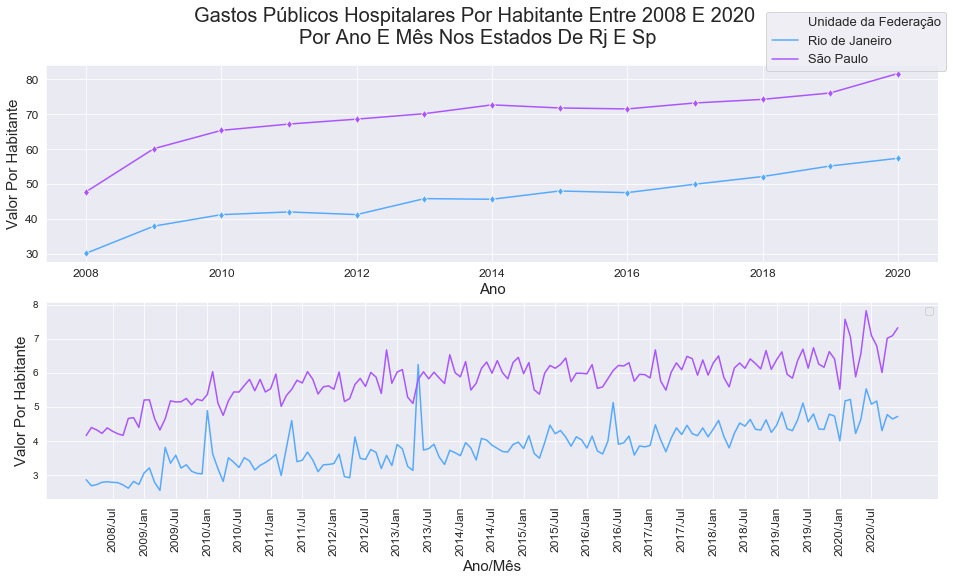

In [143]:
#Criando figura e eixos
fig, ax = plt.subplots(2,1,figsize=(16,8)) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando uma palheta de cores
sns.set_palette(sns.color_palette('cool', 2))

#Título Figura
fig.suptitle('Gastos Públicos Hospitalares Por Habitante Entre 2008 E 2020 \nPor Ano E Mês Nos Estados De Rj E Sp', fontsize=20)

#Criando o gráfico de ano
plt.sca(ax[0])
sns.lineplot(x='Ano', y='value', hue='Unidade da Federação',data=prop_rj_sp_ano, marker='d')

#Plotando as legendas e mudando o tamanho das fontes
fig.suptitle('Gastos Públicos Hospitalares Por Habitante Entre 2008 E 2020 \nPor Ano E Mês Nos Estados De Rj E Sp', fontsize=20)
plt.xlabel('Ano', fontsize=15)
plt.ylabel('Valor Por Habitante', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(0.8, 1.3), loc='upper left', fontsize=13)

#Criando o gráfico de mês 
plt.sca(ax[1])
sns.lineplot(x='index', y='value', hue='Unidade da Federação',data=prop_rj_sp_melt)

#Plotando as legendas e mudando o tamanho das fontes
plt.xlabel('Ano/Mês', fontsize=15)
plt.ylabel('Valor Por Habitante', fontsize=15)
plt.xticks(fontsize=12)
plt.xticks(range(5,len(prop_rj_sp['index']), 6), lista, fontsize=12, rotation=90)
plt.legend([])

#Mostrando o gráfico
plt.show()

## Desafio 04: Faça uma análise dos dados analisados, levante hipóteses

A partir da análise dos gráficos fo possível perceber que mesmo São Paulo tendo uma população muito grande, proporcionalemnte apenas o tamanho da população não explica os altos gastos, uma vez que os gastos por indivíduos são bem altos se comparados com os do Rio de Janeiro.

Além disso no gráfico de gastos proporcionais por mês é possível perceber uma variação muito grande dependendo do mês tanto no Rio de Janeiro e em São Paulo, parece que no iníco do ano, perto de janeiro, costuma haver um pico nos gastos, isso pode ser pois o cálculo de população nos estados não leva em conta os turistas, ou seja, em meses de férias provavelmente os gastos aumentam em relação a população que mora no estado mas não necessariamente a todas as pessoas que estavam no estado naquele mês e foram atendidas.Esse fator pode ser a explicação por essa alta variação de gastos, principalmente no Rio de Janeiro que recebe muitos turistas por ano. 

## Desafio 05: Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.

Na aula foi feita a análise de gastos por estado que foi replicada aqui no desafio 1, então agora que temos os dados populacionais podemos fazer a média de gastos durante o tempo em relação a população para acda estado.

In [ ]:
import re

In [ ]:
dados_pop = dados_pop.drop([0,1])

In [ ]:
index_drop = [i for i in range(2,len(dados_pop)) if re.match(r'Região.*',dados_pop.loc[i,'Unidades da Federação'])]

In [ ]:
dados_pop = dados_pop.drop(index=index_drop)

In [ ]:
dados_pop = dados_pop.set_index('Unidades da Federação')

In [ ]:
dados_pop

In [ ]:
gasto_pop = ordenado.drop(columns=ordenado.columns[-1:-5:-1])

In [ ]:
for i in gasto_pop.index:    
    for col in gasto_pop.columns:
        ano = int(col[:4])
        gasto_pop.loc[i,col] = gasto_pop.loc[i,col] / dados_pop.loc[i,ano]

Dividindo os gastos pela estimativa da população naquele ano.

In [ ]:
gasto_pop

In [ ]:
media_gasto_pop = gasto_pop.mean(axis=1)

Calculando a média de gasto ao longo dos anos por estado

In [ ]:
media_gasto_pop = media_gasto_pop.sort_values(ascending=False)
media_gasto_pop

In [ ]:
#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando uma palheta de cores
sns.set_palette(list(reversed(sns.color_palette('Purples', 60))))

#Criando o gráfico 
sns.barplot(media_gasto_pop.index, media_gasto_pop.values)

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Média De Gastos Públicos Hospitalares Por Habitante \nEntre 2008 E 2020 Por Estado', fontsize=20)
plt.xlabel('UF', fontsize=15)
plt.ylabel('Gasto Por Habitante', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)

#Mostrando o gráfico
plt.show()

A partir da análise do gráfico podemos concluir que por mais que São Paulo é o estado que mais gasta dinheiro com saúde, em relação a população os estados do Sul ficaram na frente, ou seja a Região Sul é a que mais gasta com saúde por habitante, isso provavelmente está relacionado pela população nesses estados não serem tão grandes quanto em estados como São Paulo e mesmo assim receber verbas altas em relação aos estados do Norte e do Nordeste.